### Download file

In [1]:
link = "https://weisslab.cs.ucl.ac.uk/WEISSTeaching/datasets/-/raw/promise12/label_train00.npy"
# Download the file
!wget -O label_train00.npy $link

--2022-12-20 11:33:10--  https://weisslab.cs.ucl.ac.uk/WEISSTeaching/datasets/-/raw/promise12/label_train00.npy
Resolving weisslab.cs.ucl.ac.uk (weisslab.cs.ucl.ac.uk)... 128.16.4.22
Connecting to weisslab.cs.ucl.ac.uk (weisslab.cs.ucl.ac.uk)|128.16.4.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 524368 (512K) [application/octet-stream]
Saving to: ‘label_train00.npy’

label_train00.npy   100%[===================>] 512.08K  1.33MB/s    in 0.4s    

2022-12-20 11:33:11 (1.33 MB/s) - ‘label_train00.npy’ saved [524368/524368]



### Load the segmentation file

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy
from skimage import measure

# Load the data
label_train00 = np.load('label_train00.npy').T
label_train00.shape


(128, 128, 32)

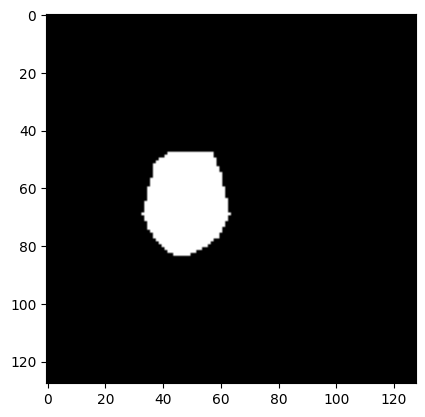

In [6]:
plt.imshow(label_train00[:,:,21], cmap='gray')

In [ ]:

# Visualise the data: 3D array with 128 rows, 128 columns and P slices
# Visualize 3D array
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.voxels(label_train00, edgecolor='k')
plt.show()

### Use skimage.measue.marching_cubes algorithim to compute vertex coordinates in mm and triangles for representing the segmentation boundary

Marching Cubes is an algorithm that can be used to extract a triangular mesh surface from a 3D image volume. 

The pixel spacing of an image can be used to determine the size of the voxels in the image. The pixel spacing is usually specified as the distance between adjacent voxels in millimeters, and it tells you the size of the voxels in the image.

For example, if the pixel spacing of an image is 0.5mm/voxel, it means that the voxels in the image are 0.5 millimeters in size. Similarly, if the pixel spacing is 0.1mm/voxel, it means that the voxels in the image are 0.1 millimeters in size.

The slice distance refers to the distance between slices in a 3D image. In medical imaging, the slice distance is often specified in millimeters and can be used to determine the thickness of the slices in the image.

If the slice distance of an image is 2mm/voxel, it means that the distance between slices in the image is 2 millimeters. This information is important because it tells you the thickness of the slices in the image and can help you interpret the image accurately. For example, if the slice distance is small (e.g., 0.5mm/voxel), the slices in the image will be relatively thin, and you will be able to see more detail in the image. On the other hand, if the slice distance is large (e.g., 5mm/voxel), the slices in the image will be relatively thick, and you may not be able to see as much detail in the image.

In [8]:
# Use marching cubes to obtain the vertex coordinates in mm and triangles
vertices, triangles, _, _ = measure.marching_cubes(label_train00, 0, spacing = (0.5, 0.5, 2))

# Print number of vertices and triangles
print(f"Number of vertices, {vertices.shape[0]}")
print(f"Number of triangeles, {triangles.shape[0]}")

# Print the first 10 vertices
print(f"first 3 vertices,  \n {vertices[:10]}")
# Print indices of the first 10 triangles
print(f"indices of first 3 triangles,  \n {triangles[:10]}")

# Print min and max of the vertices along sagittal plane
print(f"min of vertices, {vertices[:, 0].min()}, max of vertices, {vertices[:, 0].max()}")

Number of vertices, 6626
Number of triangeles, 13256
first 3 vertices,  
 [[16.5 27.5 28. ]
 [17.  27.5 26. ]
 [17.  27.  28. ]
 [17.  27.  30. ]
 [16.5 27.5 30. ]
 [17.  27.5 32. ]
 [16.5 28.  28. ]
 [17.  28.  26. ]
 [16.5 28.  30. ]
 [17.  28.  32. ]]
indices of first 3 triangles,  
 [[2 1 0]
 [4 3 0]
 [0 3 2]
 [4 5 3]
 [0 1 6]
 [6 1 7]
 [0 8 4]
 [0 6 8]
 [5 4 9]
 [9 4 8]]
min of vertices, 16.5, max of vertices, 47.0


In [7]:
triangles.dtype

dtype('int32')

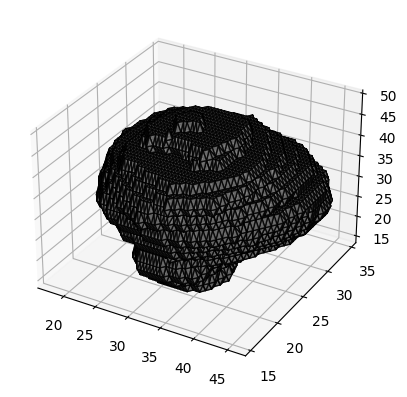

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Extract the vertex coordinates and triangle faces of the mesh
vertices, faces, _, _ = measure.marching_cubes(label_train00, 0, spacing = (0.5, 0.5, 2))

# Create a figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a Poly3DCollection with the triangle faces
mesh = Poly3DCollection(vertices[faces], alpha=0.8, edgecolor='k')
mesh.set_facecolor((0.5, 0.5, 0.5))

# Add the mesh to the axes
ax.add_collection(mesh)

# Set the axis limits
ax.set_xlim(vertices[:, 0].min(), vertices[:, 0].max())
ax.set_ylim(vertices[:, 1].min(), vertices[:, 1].max())
ax.set_zlim(vertices[:, 2].min(), vertices[:, 2].max())

# Show the plot
plt.show()


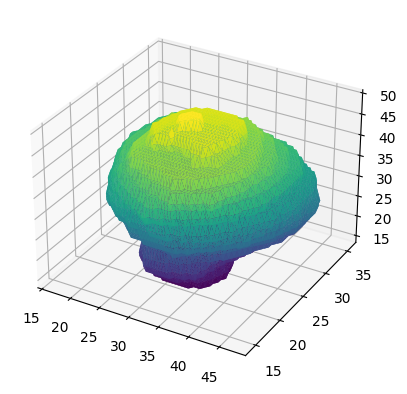

In [15]:
# Create a figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the triangle faces
ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=triangles, alpha = 1, cmap='viridis')

# Show the plot
plt.show()

### Divide this triangulated surface into two surfaces

In [33]:
vertices

array([[16.5, 27.5, 28. ],
       [17. , 27.5, 26. ],
       [17. , 27. , 28. ],
       ...,
       [47. , 30. , 28. ],
       [47. , 30.5, 28. ],
       [47. , 31. , 28. ]])

In [34]:
vertices[vertices[:, 0] <31.5]

array([[16.5, 27.5, 28. ],
       [17. , 27.5, 26. ],
       [17. , 27. , 28. ],
       ...,
       [31. , 34.5, 36. ],
       [31. , 34. , 26. ],
       [31. , 34. , 32. ]])

In [36]:
sagittal_plane = np.median(vertices[:, 0].flatten())

from surface_dividing import surface_dividing
triangulated_surface = [vertices, triangles]
left_surfaces, right_surfaces = surface_dividing(triangulated_surface, sagittal_plane = sagittal_plane+0.1)

# Extract left surface vertices and triangles
left_vertices = np.asarray(left_surfaces[0], dtype = np.float64)
left_triangles = np.asarray(left_surfaces[1], dtype = np.int32)

# Extract right surface vertices and triangles
right_vertices = np.asarray(right_surfaces[0], dtype = np.float64)
right_triangles = np.asarray(right_surfaces[1], dtype = np.int32)

In [ ]:
# color maps in matplotlib
# plot_color_gradients('Perceptually Uniform Sequential',
#                      ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

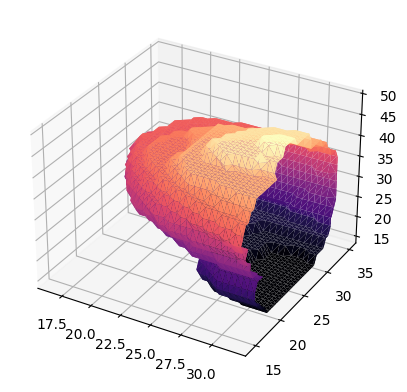

In [41]:
# Create a figure and 3D axes for left surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the triangle faces
ax.plot_trisurf(left_vertices[:, 0], left_vertices[:, 1], left_vertices[:, 2], triangles=left_triangles, alpha = 1, cmap='magma')

# Show the plot
plt.show()

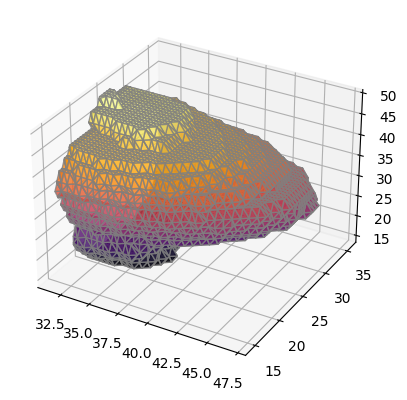

In [44]:
# Create a figure and 3D axes for right surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the triangle faces
ax.plot_trisurf(right_vertices[:, 0], right_vertices[:, 1], right_vertices[:, 2], triangles=right_triangles, alpha = 0.8, cmap='inferno', edgecolor='gray')

# Show the plot
plt.show()

In [45]:
# Let's start easy and split this triangulated surface into 2 surfaces, left and right
sagittal_plane = np.median(vertices[:, 0].flatten())

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the left surface in the first subplot
ax1.add_collection(Poly3DCollection(left_vertices[left_triangles], alpha=0.5, facecolor='blue'))
ax1.set_title('Left Surface')
# ax1.set_xlabel('X (mm)')
# ax1.set_ylabel('Y (mm)')
# ax1.set_zlabel('Z (mm)')

# Plot the right surface in the second subplot
ax2.add_collection(Poly3DCollection(right_vertices[right_triangles], alpha=0.5, facecolor='red'))
ax2.set_title('Right Surface')
# ax2.set_xlabel('X (mm)')
# ax2.set_ylabel('Y (mm)')
# ax2.set_zlabel('Z (mm)')

plt.show()


AttributeError: 'AxesSubplot' object has no attribute 'get_proj'

<Figure size 1000x500 with 2 Axes>

In [46]:
Poly3DCollection(vertices_right[triangles[:10]], alpha=0.8, edgecolor='k')


In [47]:
vertices_left

array([[16.5, 27.5, 28. ],
       [17. , 27.5, 26. ],
       [17. , 27. , 28. ],
       ...,
       [31. , 34.5, 36. ],
       [31. , 34. , 26. ],
       [31. , 34. , 32. ]])

In [14]:
triangles[0]

array([2, 1, 0], dtype=int32)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(vertices[triangles])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

plt.tight_layout()
plt.show()

In [2]:
import visvis as vv
verts, faces, normals, values = measure.marching_cubes(label_train00, 0)
vv.mesh(np.fliplr(verts), faces, normals, values)
vv.use().Run()

: 

: 

In [18]:
sagittal_plane = np.median(vertices[:, 0].flatten())

from surface_dividing import surface_dividing
triangulated_surface = [vertices, triangles]
left_surfaces, right_surfaces = surface_dividing(triangulated_surface, sagittal_plane = sagittal_plane+0.1)

In [ ]:
left_surfaces

In [ ]:
right_surfaces

In [60]:
triangulated_surface = [vertices[:5], triangles[:5]]
triangulated_surface

[array([[16.5, 27.5, 28. ],
        [17. , 27.5, 26. ],
        [17. , 27. , 28. ],
        [17. , 27. , 30. ],
        [16.5, 27.5, 30. ]]),
 array([[2, 1, 0],
        [4, 3, 0],
        [0, 3, 2],
        [4, 5, 3],
        [0, 1, 6]], dtype=int32)]

In [55]:
left_surfaces

[[(0, 0, 0),
  (1, 1, 0),
  (0, 1, 0),
  (1.5, 1.0, 0.0),
  (1.5, 0.75, 0.0),
  (1.5, 0.5, 0.0),
  (1.5, 0.0, 0.0)],
 [(0, 3, 4),
  (2, 3, 4),
  (0, 2, 3),
  (0, 2, 4),
  (0, 5, 6),
  (1, 5, 6),
  (0, 1, 5),
  (0, 1, 6)]]

In [63]:
tuple(vertices[0])

(16.5, 27.5, 28.0)

In [3]:
import numpy as np

triangles = [(0, 3, 4), (0, 1, 2)]
np.asarray(triangles, dtype=np.float32)

array([[0., 3., 4.],
       [0., 1., 2.]], dtype=float32)

In [13]:
sagittal_plane = np.median(vertices[:, 0].flatten())

In [17]:
vertices[vertices[:, 0] == sagittal_plane+0.1]

array([], shape=(0, 3), dtype=float64)

In [ ]:

# Extract left surface vertices and triangles
left_vertices_1 = np.asarray(left_surfaces[0], dtype = np.float64)
left_triangles_1 = np.asarray(left_surfaces[1], dtype = np.int32)

# Extract right surface vertices and triangles
right_vertices_1 = np.asarray(right_surfaces[0], dtype = np.float64)
right_triangles_1 = np.asarray(right_surfaces[1], dtype = np.int32)

# The second plane is at the 25th percentile of the x values
sagittal_plane_2 = np.percentile(vertices[:, 0].flatten(), 25)

# Call the surface_dividing function and divide the surface into two surfaces, left and right
left_surfaces, right_surfaces = surface_dividing(triangulated_surface, sagittal_plane = sagittal_plane_2)

# Extract left surface vertices and triangles
left_vertices_2 = np.asarray(left_surfaces[0], dtype = np.float64)
left_triangles_2 = np.asarray(left_surfaces[1], dtype = np.int32)

# Extract right surface vertices and triangles
right_vertices_2 = np.asarray(right_surfaces[0], dtype = np.float64)
right_triangles_2 = np.asarray(right_surfaces[1], dtype = np.int32)

# The third plane is at the 75th percentile of the x values
sagittal_plane_3 = np.percentile(vertices[:, 0].flatten(), 75)

# Call the surface_dividing function and divide the surface into two surfaces, left and right
left_surfaces, right_surfaces = surface_dividing(triangulated_surface, sagittal_plane = sagittal_plane_3)

# Extract left surface vertices and triangles
left_vertices_3 = np.asarray(left_surfaces[0], dtype = np.float64)
left_triangles_3 = np.asarray(left_surfaces[1], dtype = np.int32)

# Extract right surface vertices and triangles
right_vertices_3 = np.asarray(right_surfaces[0], dtype = np.float64)
right_triangles_3 = np.asarray(right_surfaces[1], dtype = np.int32)

# Plot the three saggital planes and the corresponding left and right surfaces


